# Testing notebook with the updated features

In [3]:
import pandas as pd
pd.options.display.max_columns = None

df = pd.read_csv('../data/spanish_corpus_features_v5.csv')
df.head()

,text,headline,words_h,word_size_h,avg_syllables_word_h,unique_words_h,ttr_h,mltd_h,sents,words,avg_words_sent,avg_word_size,avg_syllables_word,unique_words,ttr,mltd,i_fernandez_huerta,i_szigriszt_pazos,entity_ratio,n_quotes,quotes_ratio,propn_ratio,noun_ratio,adp_ratio,det_ratio,punct_ratio,pron_ratio,verb_ratio,adv_ratio,sym_ratio,label
0,sofía castro y alejandro peña pretelini: una i...,sofía castro y alejandro peña pretelini: una i...,12,5.58,2.50,100.00,100.00,0.00,6,244,40.67,4.30,1.78,36.07,50.82,55.73,58.56,55.10,7.38,0,0.00,15.57,15.98,14.34,11.89,9.02,5.74,6.56,3.28,0.00,1
1,un paso más cerca de hacer los exámenes 'onlin...,un paso más cerca de hacer los exámenes 'online',11,3.64,1.55,81.82,90.91,33.88,9,462,51.33,4.42,1.79,34.42,46.10,44.90,47.08,44.25,9.52,4,0.87,16.67,17.10,12.99,11.69,18.83,1.30,3.46,1.73,1.30,1
2,esto es lo que los científicos realmente piens...,esto es lo que los científicos realmente piens...,12,4.83,1.67,83.33,91.67,40.32,29,956,32.97,4.91,1.95,26.67,39.33,78.16,56.21,52.59,2.93,39,4.08,4.81,18.62,14.33,13.08,11.72,2.62,10.56,4.81,0.21,1
3,inicia impresión de boletas para elección pres...,inicia impresión de boletas para elección pres...,7,6.86,2.71,100.00,100.00,0.00,10,347,34.70,4.97,2.02,24.21,39.19,54.51,50.25,46.28,2.88,4,1.15,4.32,25.94,19.31,16.14,9.80,2.88,7.78,0.29,0.00,1
4,a número día del mundial fifa.com sigue la cue...,a número día del mundial,5,4.00,1.80,100.00,100.00,0.00,4,117,29.25,4.85,2.00,53.85,64.96,55.90,57.01,52.99,8.55,0,0.00,11.11,19.66,19.66,15.38,6.84,3.42,4.27,1.71,0.00,1


In [4]:
df.columns

Index(['text', 'headline', 'words_h', 'word_size_h', 'avg_syllables_word_h',
       'unique_words_h', 'ttr_h', 'mltd_h', 'sents', 'words', 'avg_words_sent',
       'avg_word_size', 'avg_syllables_word', 'unique_words', 'ttr', 'mltd',
       'i_fernandez_huerta', 'i_szigriszt_pazos', 'entity_ratio', 'n_quotes',
       'quotes_ratio', 'propn_ratio', 'noun_ratio', 'adp_ratio', 'det_ratio',
       'punct_ratio', 'pron_ratio', 'verb_ratio', 'adv_ratio', 'sym_ratio',
       'label'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  971 non-null    object 
 1   headline              971 non-null    object 
 2   words_h               971 non-null    int64  
 3   word_size_h           971 non-null    float64
 4   avg_syllables_word_h  971 non-null    float64
 5   unique_words_h        971 non-null    float64
 6   ttr_h                 971 non-null    float64
 7   mltd_h                971 non-null    float64
 8   sents                 971 non-null    int64  
 9   words                 971 non-null    int64  
 10  avg_words_sent        971 non-null    float64
 11  avg_word_size         971 non-null    float64
 12  avg_syllables_word    971 non-null    float64
 13  unique_words          971 non-null    float64
 14  ttr                   971 non-null    float64
 15  mltd                  9

## Without TIFIDF transformation features

Testing AUC: 0.874930


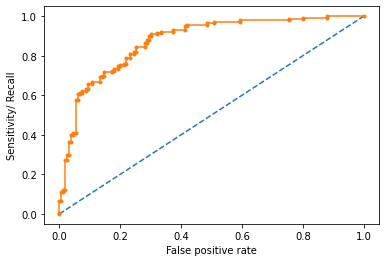

Logloss: 7.45
Accuracy: 78.42


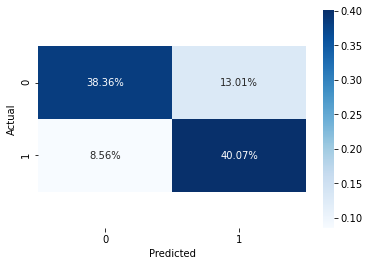

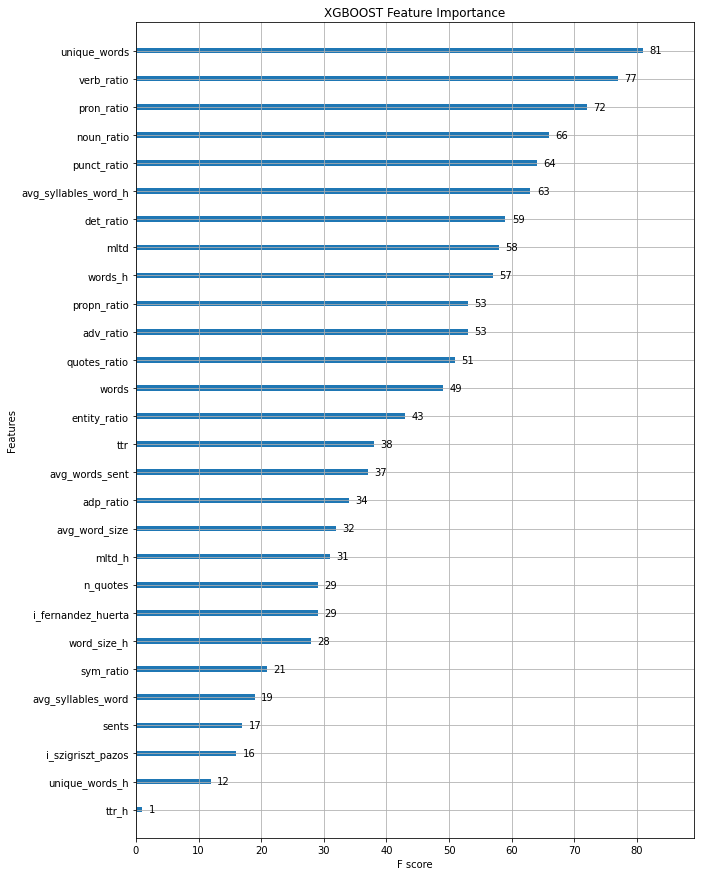

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, classification_report, log_loss

df = pd.read_csv('../data/spanish_corpus_features_v5.csv')
y = df['label']

########### Training and testing split ########### 

numerical_features = ['words_h', 'word_size_h', 'avg_syllables_word_h',
       'unique_words_h', 'ttr_h', 'mltd_h', 'sents', 'words', 'avg_words_sent',
       'avg_word_size', 'avg_syllables_word', 'unique_words', 'ttr', 'mltd',
       'i_fernandez_huerta', 'i_szigriszt_pazos', 'entity_ratio', 'n_quotes',
       'quotes_ratio', 'propn_ratio', 'noun_ratio', 'adp_ratio', 'det_ratio',
       'punct_ratio', 'pron_ratio', 'verb_ratio', 'adv_ratio', 'sym_ratio']

X = df[numerical_features]
tfvocab = df[numerical_features].columns.tolist()

# Calculating level of imbalance for modelling
imbalance_weight = y.value_counts(normalize = True)[0] / y.value_counts(normalize = True)[1]

# Training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)


########### XGB CLassifier ########### 

xgb_model = XGBClassifier(eval_metric = 'auc', objective = 'binary:logistic', nthread = 1, seed = 43, 
                    scale_pos_weight = imbalance_weight)

xgb_params = {'alpha': 0.4, 
              'colsample_bytree': 0.2, 
              'lambda': 0.5, 
              'learning_rate': 0.03, 
              'max_depth': 4, 
              'min_child_weight': 3, 
              'n_estimators': 200, 
              'subsample': 0.3}

xgb_model.fit(X_train, y_train)


########### Predictions and results ###########

# predictions
y_pred = xgb_model.predict(X_test)
probs = xgb_model.predict_proba(X_test)
probs = probs[:, 1]

# testing AUC
auc = roc_auc_score(y_test, probs)
print('Testing AUC: %f' % auc)

# roc curve calculation
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)

# plot the limits for no skill
plt.plot([0, 1], [0, 1], linestyle = '--')

# plot the roc curve

plt.plot(false_positive_rate, true_positive_rate, marker = '.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
plt.show();

# accuracy score
print('Logloss: %.2f' % (log_loss(y_test, y_pred)))
print('Accuracy: %.2f' % (xgb_model.score(X_test, y_test) * 100))

# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred, labels = [0, 1])
ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Blues')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show();


########### Feature importance ###########

dict_features = dict(enumerate(tfvocab))

# feature importance with default names

f, ax = plt.subplots(figsize = [10, 15])
axsub = xgb.plot_importance(xgb_model, ax = ax)

# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(tfvocab))
list_yticklabels = [Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]

# feature importance
plt.title("XGBOOST Feature Importance")
axsub.set_yticklabels(list_yticklabels)
plt.show()

## With TFIDF features

/home/pipe11/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['algun', 'com', 'contr', 'cuand', 'desd', 'dond', 'durant', 'eram', 'estab', 'estais', 'estam', 'estan', 'estand', 'estaran', 'estaras', 'esteis', 'estem', 'esten', 'estes', 'estuv', 'fuer', 'fues', 'fuim', 'fuist', 'hab', 'habr', 'habran', 'habras', 'hast', 'hem', 'hub', 'mas', 'mia', 'mias', 'mio', 'mios', 'much', 'nad', 'nosotr', 'nuestr', 'par', 'per', 'poc', 'porqu', 'qui', 'seais', 'seam', 'sent', 'ser', 'seran', 'seras', 'si', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambien', 'tant', 'ten', 'tendr', 'tendran', 'tendras', 'teng', 'tien', 'tod', 'tuv', 'tuy', 'vosotr', 'vuestr'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Testing AUC: 0.908028


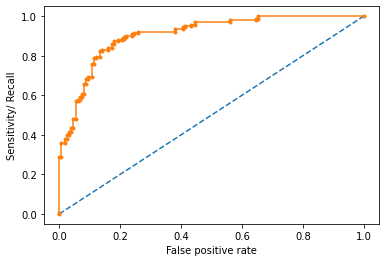

Logloss: 5.68
Accuracy: 83.56


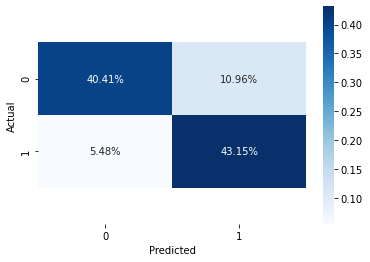

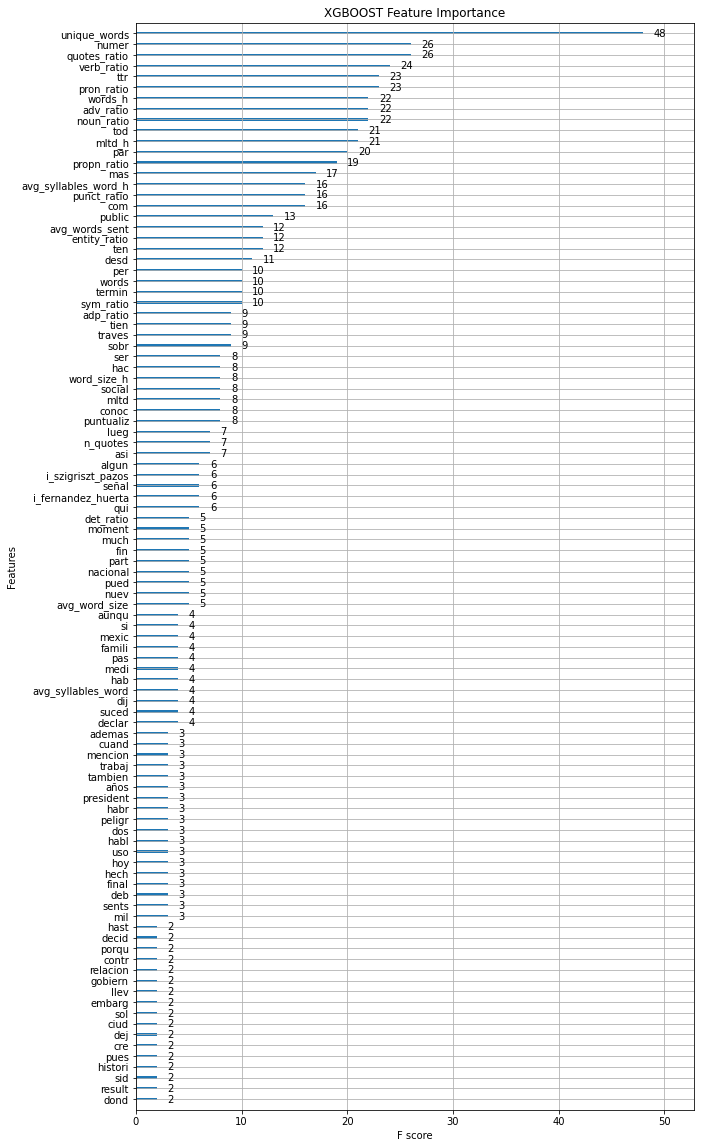

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords  
from nltk import word_tokenize  
from nltk.data import load  
from nltk.stem import SnowballStemmer  
from string import punctuation

from scipy import stats
from scipy.sparse import hstack, csr_matrix
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, classification_report, log_loss

df = pd.read_csv('../data/spanish_corpus_features_v5.csv')
y = df['label']

####### TFIDF Transformation to text ########

#Stopword list to use
spanish_stopwords = stopwords.words('spanish')

#Spanish stemmer:
stemmer = SnowballStemmer('spanish')

def stem_tokens(tokens, stemmer):  
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

#Punctuation to remove
non_words = list(punctuation)

#Adding spanish punctuation
non_words.extend(['¿', '¡'])  
non_words.extend(map(str,range(10)))

def tokenize(text):  
    #Remove punctuation
    text = ''.join([c for c in text if c not in non_words])
    #Tokenize
    tokens =  word_tokenize(text)

    #Stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems


tfidf_vectorizer = TfidfVectorizer(  
                analyzer = 'word',
                tokenizer = tokenize,
                lowercase = True,
                stop_words = spanish_stopwords)

text_vectorized = tfidf_vectorizer.fit_transform(df['text'])

tfvocab = tfidf_vectorizer.get_feature_names()


########### Combine features & train, test split ########### 

numerical_features = ['words_h', 'word_size_h', 'avg_syllables_word_h',
       'unique_words_h', 'ttr_h', 'mltd_h', 'sents', 'words', 'avg_words_sent',
       'avg_word_size', 'avg_syllables_word', 'unique_words', 'ttr', 'mltd',
       'i_fernandez_huerta', 'i_szigriszt_pazos', 'entity_ratio', 'n_quotes',
       'quotes_ratio', 'propn_ratio', 'noun_ratio', 'adp_ratio', 'det_ratio',
       'punct_ratio', 'pron_ratio', 'verb_ratio', 'adv_ratio', 'sym_ratio']

X = hstack([csr_matrix(df[numerical_features].values), text_vectorized[0:]])
tfvocab = df[numerical_features].columns.tolist() + tfvocab

# Calculating level of imbalance for modelling
imbalance_weight = y.value_counts(normalize = True)[0] / y.value_counts(normalize = True)[1]

# Training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)


########### XGB CLassifier ########### 

xgb_model = XGBClassifier(eval_metric = 'auc', objective = 'binary:logistic', nthread = 1, seed = 43, 
                    scale_pos_weight = imbalance_weight)

xgb_params = {'alpha': 0,
              'colsample_bytree': 0.5,
              'lambda': 1,
              'learning_rate': 0.02,
              'max_depth': 6,
              'min_child_weight': 1,
              'n_estimators': 1000,
              'subsample': 0.4}

xgb_model.fit(X_train, y_train)


########### Predictions and results ###########

# predictions
y_pred = xgb_model.predict(X_test)
probs = xgb_model.predict_proba(X_test)
probs = probs[:, 1]

# testing AUC
auc = roc_auc_score(y_test, probs)
print('Testing AUC: %f' % auc)

# roc curve calculation
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs)

# plot the limits for no skill
plt.plot([0, 1], [0, 1], linestyle = '--')

# plot the roc curve

plt.plot(false_positive_rate, true_positive_rate, marker = '.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
plt.show();

# accuracy score
print('Logloss: %.2f' % (log_loss(y_test, y_pred)))
print('Accuracy: %.2f' % (xgb_model.score(X_test, y_test) * 100))

# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred, labels = [0, 1])
ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Blues')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show();


########### Feature importance ###########

dict_features = dict(enumerate(tfvocab))

# feature importance with default names

f, ax = plt.subplots(figsize = [10, 20])
axsub = xgb.plot_importance(xgb_model, max_num_features = 100, ax = ax)

# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(tfvocab))
lst_yticklabels = [Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [dict_features[int(i)] for i in lst_yticklabels]

# feature importance
plt.title("XGBOOST Feature Importance")
axsub.set_yticklabels(lst_yticklabels)
plt.show()